# Import Initial Dependencies

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Import Data Set

In [88]:
df = pd.read_csv(r"C:\Users\wvill\Documents\GitHub\DABProject3\0-Data\winequalityN.csv")

# Processing and Cleaning

In [89]:
df.shape

(6497, 13)

In [90]:
df.dropna(axis=0, inplace=True)
df.shape

(6463, 13)

In [91]:
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [93]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [94]:
#df.drop(['volatile acidity', 'free sulfur dioxide', 'citric acid'], axis=1, inplace=True)

#going to include these to see if I can change the outcome of the model

In [95]:
df = df.rename(columns = {
    "fixed acidity": "fixed_acidity",
    "residual sugar": "residual_sugar",
    "total sulfur dioxide": "total_sulfur_dioxide",
    "free sulfur dioxide": "free_sulfur_dioxide",
    "volatile acidity": "volatile_acidity",
    } )

In [96]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [97]:
bn = [1,5,9]
label = ['low','high']
df['categorical_quality']=pd.cut(df['quality'], bins=bn, labels=label)

In [98]:
df.head(40)

,type,fixed_acidity,volatile_acidity,citric acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,categorical_quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,high
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,high
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,high
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,high
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,high
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,high
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,high
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,high
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,high
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,high


# Exploratory Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

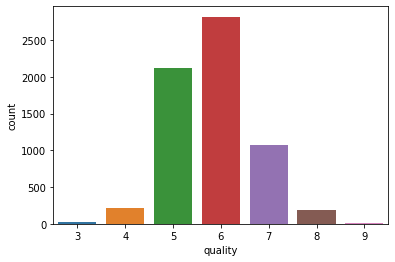

In [99]:
sns.countplot('quality', data=df)

<AxesSubplot:xlabel='categorical_quality', ylabel='count'>

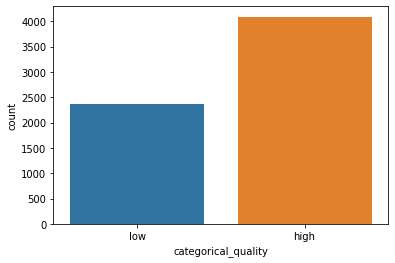

In [100]:
sns.countplot('categorical_quality', data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

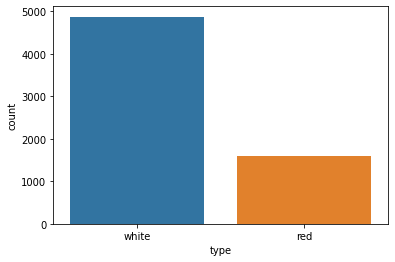

In [101]:
sns.countplot('type', data=df)

In [102]:
df_red = df[df.iloc[:,0] == 'red']
df_white = df[df.iloc[:,0] == 'white']

In [103]:
df_red.head()

,type,fixed_acidity,volatile_acidity,citric acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,categorical_quality
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high
4902,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [104]:
df_red.shape

(1593, 14)

<AxesSubplot:xlabel='quality', ylabel='count'>

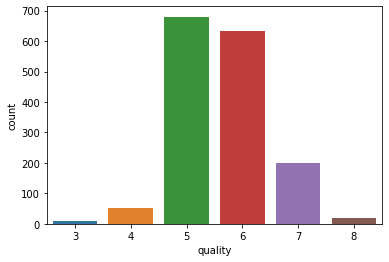

In [105]:
sns.countplot('quality', data=df_red)

<AxesSubplot:xlabel='categorical_quality', ylabel='count'>

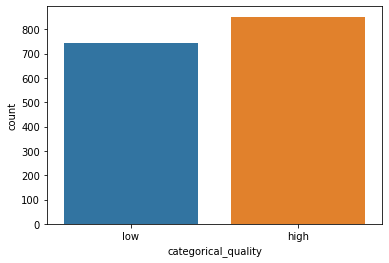

In [106]:
sns.countplot('categorical_quality', data=df_red)

In [107]:
df_white.head()

,type,fixed_acidity,volatile_acidity,citric acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,categorical_quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,high
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,high
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,high
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,high
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,high


In [108]:
df_white.shape

(4870, 14)

<AxesSubplot:xlabel='quality', ylabel='count'>

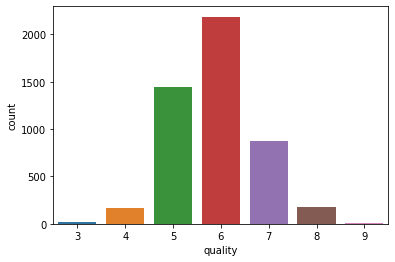

In [109]:
sns.countplot('quality', data=df_white)

<AxesSubplot:xlabel='categorical_quality', ylabel='count'>

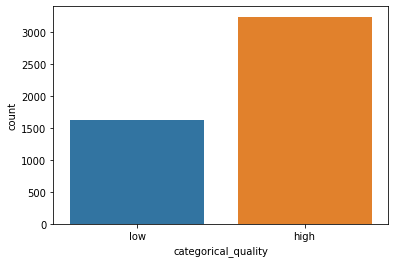

In [110]:
sns.countplot('categorical_quality', data=df_white)

In [111]:
df.describe()

,fixed_acidity,volatile_acidity,citric acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [112]:
#Calculate correlation (pearson)

corr=df.corr()


<AxesSubplot:>

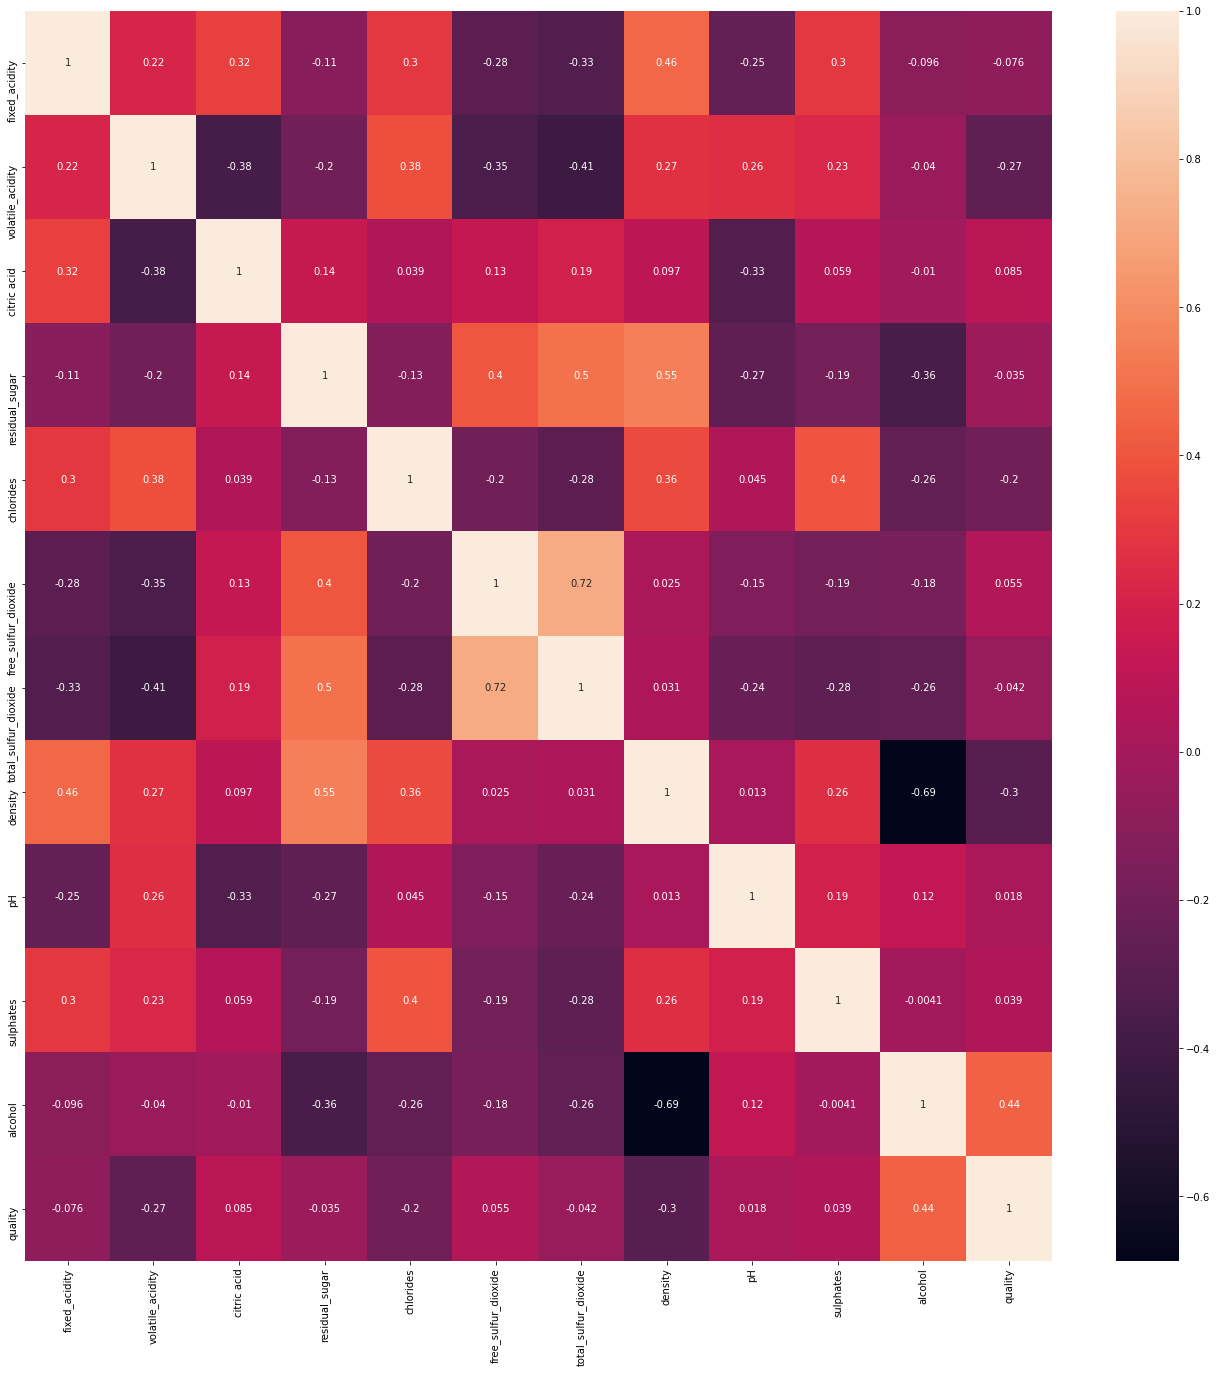

In [113]:
#Plot correlation out on a heatmap to see which of the variables correlate with each other

plt.figure(figsize=[23,23])
sns.heatmap(df.corr(),annot=True)

In [114]:
df.drop(['quality', 'type', 'fixed_acidity', 'citric acid', 'free_sulfur_dioxide', 'total_sulfur_dioxide'], axis=1, inplace=True)

# issues with negative end. removed small values which made it worse. Removed high values and lowest values which seems to have made the LR better but the RF not so good

# Note

Based on the correlation above chlorides, density, alcohol, ph and sulphates would be the best determining factors for wine quality

# Modelling

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['categorical_quality']=le.fit_transform(df['categorical_quality'])

<AxesSubplot:xlabel='categorical_quality', ylabel='count'>

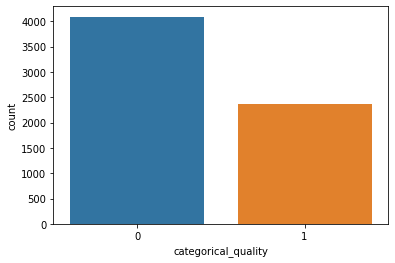

In [116]:
sns.countplot('categorical_quality', data=df)

0 = High
1 = Low

In [117]:
y = df.categorical_quality
y = y.values.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [118]:
X = df.drop('categorical_quality', axis=1).values
X

array([[ 0.27 , 20.7  ,  0.045, ...,  3.   ,  0.45 ,  8.8  ],
       [ 0.3  ,  1.6  ,  0.049, ...,  3.3  ,  0.49 ,  9.5  ],
       [ 0.28 ,  6.9  ,  0.05 , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 0.51 ,  2.3  ,  0.076, ...,  3.42 ,  0.75 , 11.   ],
       [ 0.645,  2.   ,  0.075, ...,  3.57 ,  0.71 , 10.2  ],
       [ 0.31 ,  3.6  ,  0.067, ...,  3.39 ,  0.66 , 11.   ]])

# Note

High Values, need scaling

In [119]:
#Test train split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [120]:
X_train.shape

(4524, 7)

In [121]:
#Scale Features

from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
scl.fit_transform(X,y)

array([[-0.42270958,  3.20742026, -0.31522756, ..., -1.35916011,
        -0.5449872 , -1.41892232],
       [-0.2404789 , -0.80815119, -0.20118008, ...,  0.50839916,
        -0.27635393, -0.83218392],
       [-0.36196602,  0.30611733, -0.17266821, ...,  0.25939126,
        -0.61214551, -0.32926528],
       ...,
       [ 1.03513588, -0.66098365,  0.56864043, ...,  1.25542287,
         1.46976231,  0.42511267],
       [ 1.85517396, -0.72405545,  0.54012856, ...,  2.18920251,
         1.20112905, -0.24544551],
       [-0.17973534, -0.3876725 ,  0.31203359, ...,  1.06866695,
         0.86533746,  0.42511267]])

# Modelling

## Import Dependencies

In [122]:
#Import Models and Metrics

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Cross Validation
from sklearn.model_selection import cross_val_score

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Logistic Regression

## Training Set

In [123]:
#Create Logistic Regression Model for training

lr=LogisticRegression()
lr.fit(X_train,y_train.ravel())

LogisticRegression()

In [124]:
#Calculate Cross Validation Score for training set

lr_cross_val = cross_val_score(estimator=lr,X=X_train,y=y_train.ravel(),cv=10).mean()

print(f' Cross Validation score is {(lr_cross_val * 100).round(2)}% ')

 Cross Validation score is 73.8% 


In [125]:
#Calculate Accuracy Score for training set

y_lr_train=lr.predict(X_train)
lr_train_accuracy = (accuracy_score(y_train,y_lr_train))
print(f""" Model accuracy is {(lr_train_accuracy * 100).round(2)}%        
        """)

 Model accuracy is 73.83%        
        


## Test Set

In [126]:
#Calculate Accuracy Score for test set

y_lr_test=lr.predict(X_test)
lr_test_accuracy = accuracy_score(y_test,y_lr_test)
print(f""" Model accuracy is {(lr_test_accuracy * 100).round(2)}%        
        """)

 Model accuracy is 73.08%        
        


In [127]:
#Determine Confusion Matrix

print(f""" Confusion matrix\
    {confusion_matrix(y_test,y_lr_test)}""")

 Confusion matrix    [[1048  196]
 [ 326  369]]


In [128]:
#Classification Report

print(classification_report(y_test, y_lr_test))


              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1244
           1       0.65      0.53      0.59       695

    accuracy                           0.73      1939
   macro avg       0.71      0.69      0.69      1939
weighted avg       0.72      0.73      0.72      1939



1st Run Decent positives, woeful on the negatives.

Decent results after fix.


In [129]:
#Dump Model into PKL

pickle.dump(lr,open('lrsommelier.pkl','wb'))

# Random Forest

In [130]:
#Create and Fit Random Forest model

rfc_r=RandomForestClassifier(n_estimators=500,criterion='entropy',max_features=6,max_depth=10,random_state=42)
rfc_r.fit(X_train,y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=6,
                       n_estimators=500, random_state=42)

## Training Set

In [131]:
#Calculate Cross Validation Score

rfc_cross_val = cross_val_score(estimator=rfc_r,X=X_train,y=y_train.ravel(),cv=5).mean()

print(f' Cross Validation score is {(rfc_cross_val * 100).round(2)}% ')

 Cross Validation score is 78.49% 


In [132]:
#Calculate Accuracy Score fore training set

y_rfc_train=rfc_r.predict(X_train)
rfc_train_accuracy = accuracy_score(y_train,y_rfc_train)

print(f""" Model accuracy is {(rfc_train_accuracy * 100).round(2)}%        
        """)

 Model accuracy is 90.61%        
        


## Test Set

In [133]:
#Calculate Accuracy Score for test set

y_rfc_test=rfc_r.predict(X_test)
rfc_test_accuracy = accuracy_score(y_test,y_rfc_test)

print(f""" Model accuracy is {(rfc_test_accuracy * 100).round(2)}%        
        """)

 Model accuracy is 80.14%        
        


In [134]:
#Calculate Confusion Matrix

print(confusion_matrix(y_test,y_rfc_test))

[[1063  181]
 [ 204  491]]


1st Run Same issue. Problem with features overfitting at the lower end?

In [135]:
#Classification Report

print(classification_report(y_test, y_rfc_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1244
           1       0.73      0.71      0.72       695

    accuracy                           0.80      1939
   macro avg       0.78      0.78      0.78      1939
weighted avg       0.80      0.80      0.80      1939



In [136]:
#Dump Random Forest into pkl
pickle.dump(rfc_r,open('rfsommelier.pkl','wb'))


# Predictions

In [137]:
new_data = [[.5, .3, .2, .1, .1, .3,.8]]

In [138]:
predictions = rfc_r.predict(new_data)
print(le.inverse_transform([predictions]))

['low']


In [139]:
print(rfc_r.predict(new_data))

[1]


In [140]:
(X_test)

array([[ 0.24 , 15.4  ,  0.052, ...,  3.2  ,  0.69 ,  9.4  ],
       [ 0.37 , 11.2  ,  0.071, ...,  2.98 ,  0.88 ,  9.2  ],
       [ 0.2  ,  1.4  ,  0.047, ...,  3.43 ,  0.53 , 10.1  ],
       ...,
       [ 0.34 ,  2.4  ,  0.03 , ...,  3.41 ,  0.78 , 13.9  ],
       [ 0.28 ,  6.8  ,  0.045, ...,  3.09 ,  0.46 ,  9.4  ],
       [ 0.35 ,  0.9  ,  0.042, ...,  2.96 ,  0.28 , 10.4  ]])

# Import Dataset into SQLite for Flask app

In [141]:
#Import Dependency

import sqlite3

#Create connection Object

conn = sqlite3.connect(r'C:\Users\wvill\Documents\GitHub\DABProject3\0-Data\wine_quality.db')

In [142]:
#Write information to Db

df.to_sql('wine_quality', conn, if_exists='replace', index=False)

In [143]:
#Create Cursor Object

cur = conn.cursor()

#Fetch and Print result

for row in cur.execute('Select * from wine_quality'):
    print (row)

15, 2.1, 0.041, 0.99346, 3.68, 0.73, 11.4, 1)
(0.35, 2.4, 0.076, 0.99599, 3.27, 0.81, 11.0, 0)
(0.35, 2.4, 0.076, 0.99599, 3.27, 0.81, 11.0, 0)
(0.39, 1.65, 0.068, 0.99478, 3.19, 0.46, 11.4, 1)
(0.4, 2.5, 0.068, 0.99754, 3.38, 0.86, 10.5, 0)
(0.66, 1.6, 0.07, 0.99572, 3.29, 0.6, 9.3, 1)
(0.64, 2.1, 0.08, 0.99538, 3.36, 0.7, 10.9, 1)
(0.43, 2.0, 0.085, 0.99346, 3.33, 0.46, 11.9, 0)
(0.8, 7.8, 0.079, 0.9963, 3.52, 0.5, 12.2, 1)
(0.43, 2.0, 0.085, 0.99346, 3.33, 0.46, 11.9, 0)
(0.64, 2.1, 0.08, 0.99538, 3.36, 0.7, 10.9, 1)
(0.955, 1.8, 0.075, 0.99616, 3.3, 0.44, 9.6, 1)
(0.4, 4.6, 0.08, 0.99652, 3.28, 0.57, 12.5, 0)
(0.885, 2.3, 0.166, 0.99551, 3.56, 0.51, 10.8, 1)
(0.25, 2.5, 0.063, 0.99439, 3.52, 0.8, 12.4, 0)
(0.885, 2.3, 0.166, 0.99551, 3.56, 0.51, 10.8, 1)
(0.745, 1.8, 0.114, 0.99588, 3.22, 0.59, 9.5, 0)
(0.43, 1.8, 0.078, 0.99633, 3.52, 0.6, 9.5, 0)
(0.58, 2.3, 0.076, 0.99686, 3.21, 0.58, 9.5, 0)
(0.57, 1.5, 0.069, 0.99458, 3.16, 0.54, 9.8, 0)
(0.26, 2.0, 0.052, 0.9951, 3.15, 0.79, 

In [144]:
#Close Connection to database

conn.close()

# Test import  

In [145]:
import sqlite3
import pandas as pd
conn = sqlite3.connect(r'C:\Users\wvill\Documents\GitHub\DABProject3\Dashboard\wine_quality.db')
query = 'Select * from wine_quality'
df2 = pd.read_sql_query(query,conn)
conn.close()
df2.head(15)

,volatile_acidity,residual_sugar,chlorides,density,pH,sulphates,alcohol,categorical_quality
0,0.27,20.70,0.045,1.0010,3.00,0.45,8.8,0
1,0.30,1.60,0.049,0.9940,3.30,0.49,9.5,0
2,0.28,6.90,0.050,0.9951,3.26,0.44,10.1,0
3,0.23,8.50,0.058,0.9956,3.19,0.40,9.9,0
4,0.23,8.50,0.058,0.9956,3.19,0.40,9.9,0
5,0.28,6.90,0.050,0.9951,3.26,0.44,10.1,0
6,0.32,7.00,0.045,0.9949,3.18,0.47,9.6,0
7,0.27,20.70,0.045,1.0010,3.00,0.45,8.8,0
8,0.30,1.60,0.049,0.9940,3.30,0.49,9.5,0
9,0.22,1.50,0.044,0.9938,3.22,0.45,11.0,0


In [146]:
lrmodel=pickle.load(open('lrsommelier.pkl','rb'))

In [148]:
print(pickle.format_version)

4.0


In [153]:
pip freeze requirements

absl-py==0.11.0
astunparse==1.6.3
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
cachetools==4.2.1
certifi==2020.12.5
chardet==4.0.0
click==7.1.2
colorama @ file:///tmp/build/80754af9/colorama_1607707115595/work
cycler==0.10.0
decorator @ file:///home/ktietz/src/ci/decorator_1611930055503/work
Flask==1.1.2
flatbuffers==1.12
gast==0.3.3
google-auth==1.27.0
google-auth-oauthlib==0.4.2
google-pasta==0.2.0
grpcio==1.32.0
gunicorn==20.0.4
h5py==2.10.0
idna==2.10
importlib-metadata==3.4.0
ipykernel @ file:///C:/ci/ipykernel_1596208728219/work/dist/ipykernel-5.3.4-py3-none-any.whl
ipython @ file:///C:/ci/ipython_1612213113434/work
ipython-genutils @ file:///tmp/build/80754af9/ipython_genutils_1606773439826/work
itsdangerous==1.1.0
jedi==0.17.0
Jinja2==2.11.3
joblib==1.0.1
jupyter-client @ file:///tmp/build/80754af9/jupyter_client_1601311786391/work
jupyter-core @ file:///C:/ci/jupyter_core_1612213516947/work
Keras-Preprocessing==1.1.2
kiwisolver==1.3.1
Markdown==3.3.3
Marku